<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Multi-Layer Perceptrons</h2>

&nbsp;

### Overview


### Pre-requisites

This notebook builds on *previous notebook*

### Contents

Section 1 - Introduction to Artificial Neurons

Section 2 - Neural Network Architecture

Section 3 - MLPs for Regression and Classification

Section 4 - Conclusion

Section 5 - Glossary

Section 6 - Further Reading

### Imports

In [9]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

<h2 align="center">Section 1 - Introduction to Artificial Neurons</h2>

### 1.1 - Creating Intelligent Machines

Throughout modern human history man has asked the question 'can machines be intelligent?'. This idea goes back thousands of years, and spans many cultures. The hebrew faith speaks of the Golem, an intelligent humanoid being created from clay, the ancient Greeks told the stories of Hephaestus and Pygmalion, which incorporated intellgient robots, and so on. The goal of machine learning and aritifical intellgience is to create **Artificial General Intelligence** (AGI). Currently, many different machine learning models exist that are well-suited to a subset of tasks. In AGI, the goal is to produce a single model, that can perform any task as well as, or better, than a human. To do this, it makes sense to take inspiration from the human organ that make our intelligence possible: the brain.

&nbsp;

### 1.2 - Biological Neurons

To develop a model based on the brain, it is important to first understand the basic biology of how the brain works. The processing in the brain is perform by large networks of cells called **neurons**. Each neuron performs a simple task: take in some input singals from other neurons, and produce an output signal. By connected many millions of these simple units together, the brain is able to perform complex tasks, such as image recognition, speech, and so on. The image below (taken from [1]), shows a diagram of a biological neuron:

&nbsp;

<center><img width="50%" src="images/biological_neuron.png"></center>

&nbsp;

The labels show only the key structures in the cell, which will be explained briefly from left to right. The dendrites are the part of the cell which receive signals via chemicals called neurotransmitters. These signals will cause some sort of response from the neuron, proportional to the strength of the input signal. The soma is where the processing occurs, and where the response signal is generated. The axon carries the response away to be distributed to the surrounding neurons. Finally, the synapse is a small gap between nerve cells across which the neurotransmitters.

### 1.3 - Digital Neurons

In 1943, neuroscientist Warren McCulloch and logician Walter Pitts set out to devise a mathematical model to represent a single neuron (nerve cell), now known as **digital neurons**. These neurons take in some binary inputs (0s and 1s), and based on these values determine a binary output. The logic was that connecting many of these units together should produce similar structures to that of the brain - so called **networks** of artificial neurons. Today, we know these models as **Artificial Neural Networks** (ANNs), or simply *neural networks*. It is important to note a distinction, that although these models were inspired by the human brain, they are not exact replicas. There are a number of key biological phenomena that ignored, such as the cool down time between firing signals for each cell, and additional mathematical *sugar* that has been added to improve performance. The idea of creating an artificial neuron was the first step in revolutionising the world of artificial intelligence.

&nbsp;

### 1.4 - Perceptrons

Psychologist Frank Rosenblatt built on the ideas of McCulloch and Pitts to develop the first and most simple neural network: the **perceptron**. A perceptron is a model that uses a different type of artificial neuron called a **Threshold Logic Unit** (TLU), with either a single TLU or many connected in a network. If multiple TLUs are used, they are said to exist in the same layer, all directing their output to the same output node - hence the term **Single Layer Perceptron** which is sometimes used. Like the previous digital neurons, TLUs accept binary inputs ($x_1, x_2, x_3, ...$ summarised in a column vector $x$) and produce a single binary output ($y$). The difference between the perceptron model and the early McCulloch-Pitts model is that the effect each input has on the output of the neuron does not need to be the same, that is each input can be weighted differently using **weights**. A weight is therefore assigned to each input $w_1, w_2, w_3, ...$, which are summarised in a column vector $w$. A bias term $b$ can also be introduced, which acts as a threshold value. For the output of a neuron to be 1, the weighted sum of inputs must be greater than or equal to the bias. The weighted sum of the inputs can be written as $w^T \sdot x$ using dot product notation. The negative of the bias, $b$, is often added to this term to give a single value $z$:

&nbsp;

$\begin{align}
z = w^T \sdot x + b
\end{align}$

&nbsp;

If $z > 0$, then the weighted sum of inputs is greater than the bias. If not, then the weighted sum of inputs is smalled than the biases. This gives a convenient way to compared weighted sums and biases, using only the number 0. A function can be used to determine if the neuron should be *active* or not. That is, if the response (or **activation**) of the neuron is to fire (output a 1) or to not fire (output a 0). A neuron will only fire if $z > 0$. This function is called an **activation function**, $\theta$, which takes in $z$ as an input then returns either a 0 or a 1. The most common activation function for digital neurons is the **Heaviside function** (also called the unit step function), which outputs a 1 if a value exceeds a threshold and a 0 otherwise:

&nbsp;

$\begin{align}
\text{Heaviside}(X) = \begin{cases} 
   0 & \text{if z} < 0 \\
   1 & \text{if z} \geq 0 \\
\end{cases}
\end{align}$

&nbsp;

Another common activiation function is the **sign function**, which simply returns the sign of the input multipled by 1, and 0 if the input is 0. This instead bounds the output between -1 and 1.

&nbsp;
$\begin{align}
\text{Sign}(X) = \begin{cases} 
   -1 & \text{if z} < 0 \\
   0 & \text{if z} = 0 \\
   1 & \text{if z} \geq 0 \\
\end{cases}
\end{align}$

&nbsp;

To recap: a perceptron is a model which uses one or more TLU neurons joined together in a network. These neurons take in some input signals $x$, which have weights $w$. The sum of the weighted inputs plus the negative of the bias term $b$ is called $z$. The output of the perceptron is determined by passing $z$ through an activation function: usually either the Heaviside function or the sign function. This gives a binary response from the model, which allows the perceptron to predict binary classes. The image below (reproduced from [2]) shows a diagram for a perceptron with only one neuron and three inputs:

&nbsp;

<center><img width="50%" src="images/Perceptron.png"></center>

&nbsp;

### 1.5 - Training a Perceptron

The output of a perceptron $y$ is given by the function:

$\begin{align}
h_{w,b}(x) = \theta(x \sdot w + b)
\end{align}$

where the weights $w$ and biases $b$ are the parameters to be trained. The perceptron training algorithm that was developed by Rosenblatt was inspired by Hebb's rule - a rule in biology stating that neurons that *fire together, wire together*. This describes the phenomena that when the firing of one biological neuron triggers the firing of another neuron, the connection between them is increased. In terms of the perceptron model, this corresponds to an increase in the weight between two neurons. To implement this, the weights and biases of the network are randomly initialised. A training input is then passed to the network one at a time, and the network makes a prediction. Initially the predictions will be terrible, and so the predictions will likely be very wrong. The error can be quantified using a **cost function** (or less commonly the 'correctness' can be quantified using a fitness function). This cost function can then be used to update the weights to produce outputs for each neuron that will decrease the magnitude of the cost function. The rule for updating the weight of perceptrons is given below (taken from [4]):

&nbsp;

$\begin{align}
w_{i,j}^{\text{(next step)}} = w_{i,j} + \eta(y_j - \hat{y_j})x_i
\end{align}$

&nbsp;

where:

$w_{i,j}$ is the weight of the connection between the $i^{\text{th}}$ input neuron and the $j^{\text{th}}$ output neuron

$x_i$ is the $i^{\text{th}}$ input value of the current training instance

$\hat{y_j}$ is the output of the $j^{\text{th}}$ output neuron for the current training instance

$y_j$ is the target output of the $j^{\text{th}}$ output neuron for the current training instance

$\eta$ is the learning rate

&nbsp;

### 1.6 - Example of a Single Layer Perceptron

To illustrate the idea of a perceptron further, the cell below implements a function which mimics a perceptron with a single TLU. A set of inputs and weights are accepted, as well as a bias term for the neruon. The output is then either a 0 or a 1, depending on if the sum of the weight inputs plus the bias is greater than 0.

In [10]:
def TLU(inputs, weights, bias):
    if sum([x*w for x, w in zip(inputs,weights)]) - bias > 0:
        return 1
    else:
        return 0

In [11]:
inputs = [1, 0, 1, 1, 0]
weights = [4, -3, 2, 4, -1]
bias = 10

output = TLU(inputs, weights, bias)
print(f'The output is {output}')

The output is 0


### 1.7 - Issues with Perceptrons

**Difficult to Train**

Perceptrons are limited to only accepting and outputting binary values in their TLUs. To train the model, the weights and biases for each TLU must be adjusted such that the model outputs a 0 when expected and a 1 when expected. This can be a very difficult task, since small changes to the weights and biases can cause the output of the neuron to change drastically: that is, flip from a 0 to a 1. This makes it difficult for these models to learn. 

&nbsp;

**Restricted to Linearly-Separable Problems**

The output of a perceptron is a linear combination of its inputs from each TLU. This restricts the model to only solving **linearly separable** problems. These are problems that can be solved by using dividing the feature space with a straight line (as shown in the image on the left-hand side below). Because of this, perceptrons struggle with the so-called XOR problem (short for *exclusive OR*), which is shown in the image on the right-hand side.

&nbsp;

**Solution**

To fix these problems, there needs to be a way that small changes to the weights and biases result in small changes to the predictions, allowing the model to learn effectively. This can be achieved by allowing the neurons to receive and output values *between* 0 and 1. Such neurons are called **analogue neurons**, and require different activation functions.

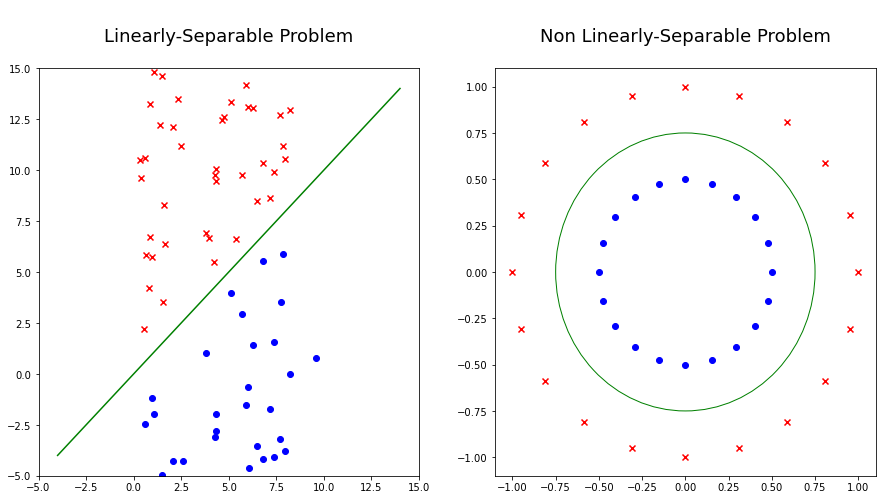

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7.5))

# Linearly-Separable

x = np.random.uniform(0,10, 50)
y_cross = x + 1 + np.random.uniform(0,13,50)
y_circle = x - 1 - np.random.uniform(0,13,50)

ax[0].set_title('\nLinearly-Separable Problem\n', fontsize=18)
ax[0].scatter(x, y_cross, c='red', marker='x')
ax[0].scatter(x, y_circle, c='blue', marker='o')
ax[0].plot([-4,14], [-4,14], c='g')
ax[0].set_xlim(-5,15)
ax[0].set_ylim(-5,15)


# Non Linearly-Separable

data = make_circles(n_samples=40, factor=0.5)
x_cross = [coords[0] for i, coords in enumerate(data[0]) if data[1][i]==0]
y_cross = [coords[1] for i, coords in enumerate(data[0]) if data[1][i]==0]
x_circle = [coords[0] for i, coords in enumerate(data[0]) if data[1][i]==1]
y_circle = [coords[1] for i, coords in enumerate(data[0]) if data[1][i]==1]
green_circle = Circle((0, 0), 0.75, color='g', fill=False)

ax[1].set_title('\nNon Linearly-Separable Problem\n', fontsize=18)
ax[1].scatter(x_cross, y_cross, c='red', marker='x')
ax[1].scatter(x_circle, y_circle, c='blue', marker='o')
ax[1].add_patch(green_circle)

### 1.8 - Sigmoid Neurons

**Sigmoid neurons** (also called *logistic* neurons) are a type of analogue neuron, and are very similar to the TLUs used in perceptrons: they take some inputs $x$ with weights $w$ with a bias $b$ and use an activation function to determine an output. However in analogue neurons, the activation function is a smooth function which outputs values between 0 and 1 (or -1 and 1). This means that very negative $z$ values will still correspond to an output near 0 (or -1), and very positive $z$ values will correspond to an output near 1. However, the $z$ values around 0 however will take a value between 0 and 1 according to the sigmoid function:

&nbsp; 

$\begin{align}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{align}$

&nbsp;  

The cells below show an analogue neuron accepting inputs with values between 0 and 1, and producing an activation of 0.

In [13]:
def analogue_neuron(inputs, weights, bias, activation_function):
    return activation_function(sum([x*w for x, w in zip(inputs,weights)]) - bias)


def sigmoid(z):
    return 1 / (1 + np.e**-z)


inputs = [0.547, 0.023, 0.981, 0.867, 0.309]
weights = [4, -3, 2, 4, -1]
bias = 5

output = analogue_neuron(inputs, weights, bias, sigmoid)

print(f'The output is {output:.3f}')

The output is 0.904


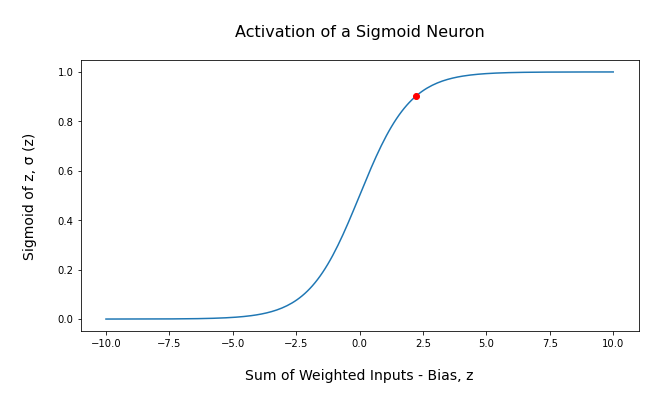

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

x = np.linspace(-10,10,200)
z = sum([x*w for x, w in zip(inputs,weights)]) - bias

ax.set_title('\nActivation of a Sigmoid Neuron\n', fontsize=16)
ax.set_ylabel('\nSigmoid of z, σ (z)\n', fontsize=14)
ax.set_xlabel('\nSum of Weighted Inputs - Bias, z\n', fontsize=14)
ax.plot(x, sigmoid(x))
ax.plot(z, sigmoid(z), color='red', marker='o')

### 1.9 - Other Activation Functions

The sigmoid function is useful because it has a smooth, gradual transition between 0 and 1, and so small changes in the inputs can give small changes in the outputs. This is what enables learning. There are other functions that can be used to maps the weighted sum minus bias to be between 0 and 1 - these include the ReLU (rectified linear unit) function, Hyperbolic Tangent, Gaussian, and more. The cells below show the different activation functions commonly use in artifical neurons, including the Heaviside function used for the digital neurons described earlier. The smoothness of an activation function is key for learning, which is brought about by small improvements to the weights and biases resulting in small improvements to the predicts of the model. This idea of small changes and improvements can be written mathematically as:

&nbsp;

$\begin{align}
\Delta output \approx \sum_j \frac{\partial \, output}{\partial w_j} \Delta w_j + 
\frac{\partial \, output}{\partial b} \Delta b
\end{align}$


In [15]:
def relu(x):
    return [0 if val < 0 else val if val < 1 else 1 for val in x]

def tan_h(x):
    return [np.tanh(val) for val in x]

def gaussian(x):
    return [np.e**(-(val**2)) for val in x]

def heaviside(x):
    return [0 if val < 0 else 1 for val in x]

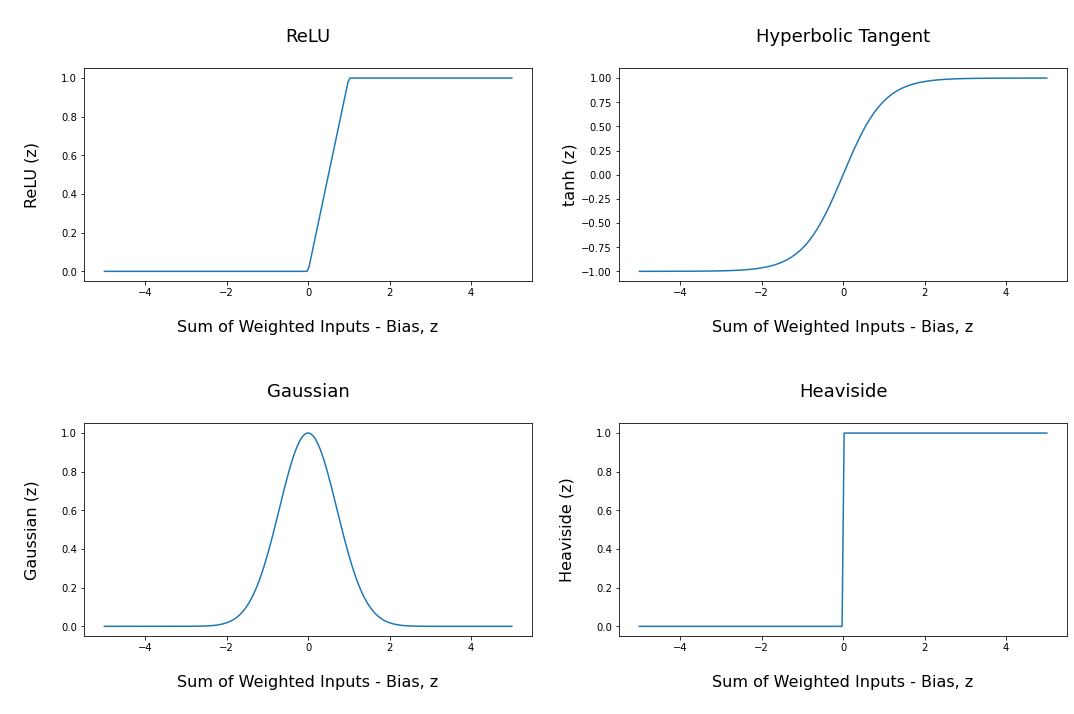

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

x = np.linspace(-5,5,200)

ax[0][0].set_title('\nReLU\n', fontsize=18)
ax[0][0].set_ylabel('\nReLU (z)\n', fontsize=16)
ax[0][0].plot(x, relu(x))

ax[0][1].set_title('\nHyperbolic Tangent\n', fontsize=18)
ax[0][1].set_ylabel('\ntanh (z)', fontsize=16)
ax[0][1].plot(x, tan_h(x))

ax[1][0].set_title('\nGaussian\n', fontsize=18)
ax[1][0].set_ylabel('\nGaussian (z)\n', fontsize=16)
ax[1][0].plot(x, gaussian(x))

ax[1][1].set_title('\nHeaviside\n', fontsize=18)
ax[1][1].set_ylabel('\nHeaviside (z)\n', fontsize=16)
ax[1][1].plot(x, heaviside(x))

for i,j in [[0,0],[0,1],[1,0],[1,1]]:
    ax[i][j].set_xlabel('\nSum of Weighted Inputs - Bias, z\n', fontsize=16)       


plt.tight_layout(pad=1)

### 1.10 - Comparison of the ReLU and Hyperbolic Tangent Activation Functions

**ReLU**

The ReLU function is continuous but is not differentiable at $z = 0$ - an important property that is used when tuning the weights and biases. However, the performance is very good and often gives a speed advantage over the other activation functions.

&nbsp;

**Hyperbolic Tangent**

Like the sigmoid function, the hyperbolic tangent function has an *S* shape, but is bound between -1 and 1, rather than 0 and 1. This has the effect of *normalising* the data (centered around 0), which can help speed up convergence.

&nbsp;

<h2 align="center">Section 2 - Neural Network Architecture</h2>

### 2.1 - Network Layers and Basic Structure

Now the types of neurons have been established, we can begin to look at the connections between them and form a network. A neural network is typically represented as a graph of nodes (representing an individual neuron) with connections to other nodes shown by arrows. The network structure is divided into **layers**, of which are three general types: **input layers**, **hidden layers**, and **output layers**. Hidden layers near the input layer are called **lower layers**, and those close to the output layer are called **upper layers**. A network will usually consist of one input layer, one of more hidden layers, and one output layer. The term *hidden* does not denote any special significance, but rather means the layer is neither an input nor an output layer. The diagram below (taken from [3]) shows an example neural network with two hidden layers:

&nbsp;

<center><img width="50%" src="images/Neural Network Two Hidden Layers.png"></center>

&nbsp;

This type of ANN is often referred to as a **Multi-Layer Perceptron** (MLP). This name is a misnomer, and exists mostly for historical reasons. MLPs rarely contain perceptrons, owing to the disadvantages discussed above. Most of the time, they do in fact contain analogue neurons using the sigmoid activation function (or other smooth activation functions). Since the information flows in one direction from the inputs to the outputs, MLPs are also said to be **feedforward** networks. More complex networks called *recurrent neural networks* use bi-directional information flow between layers, which mean that they are not purely feedforward networks, and so this is a useful distinction to make.

&nbsp;

### 2.2 - Designing a Network

The number of nodes in each layer and number of layers themselves is a design choice that should be made by the engineer. Unfortunately, there are no simple rules that can always be followed for each step of the design process. However, there are a number of useful heuristics that are problem-dependent, and are discussed throughout the notebooks in this chapter. These mostly apply to the hidden layers, and designing the input and output layers is usually fairly straightforward. For the input layer, simply have an input node for each piece of information that should be fed to the network. For example, for a network being used to classify images, an input could be used for each pixel. The output is also straightforward, and should contain a node for each output expected from the model. For a **binary classification** problem, a single node is sufficient. If the output at the node is < 0.5, then a negative classification is made. If the output is $\geq$ 0.5, then a positive classification is made. For a **multi-class classification** problem with many (> 2) possible output values, the number of nodes in the output layer should be equal to the number of possible classes.

&nbsp;

### 2.3 - Training an MLP

Research on MLPs was halted for around two decades as there was no way to train a network that contained hidden layers. This was until 1986, when David Rumelhart, Geoffrey Hinton, and Ronald Williams published their seminal paper introducing **backpropagation** [5]. The backpropagation algorithm uses gradient descent to determine the gradients of the error surface for a model. That is, each parameter (weights and biases) introduce some amount of error to the model. Some of these parameters are contributing more error than others. Backpropagation determines the change the should be made to each weight and bias (proportionally to the amount of error they introduce to the system) to reduce the error reported by the cost function. In doing so, the cost function is subject to minimisation, improving the performance of the model. Once the parameters have been adjusted accordingly, more training examples are given to the model and the cycle repeats. This continues until the model reaches convergence.

&nbsp;

### 2.4 - Overview of the Backpropagation Algorithm

The backpropagation algorithm is the workhorse that allows an MLP to learn from data - in essence this is what makes MLPs a part of machine learning. The algorithm consists of two steps: the forward pass, and the backward pass. The forward pass is completed by moving forwards through the network, calculating the output each neuron in all the layers. By contrast, the backwards pass is completed by moving backwards through the network, updating the values of the weights and biases for each neuron to improve the performance of the model. These two steps are repeated for many training inputs, which constitutes the training phase of the building a neural network. Below is a high-level overview of the steps involved in the backpropagation algorithm:

&nbsp;

**Step 1)** Randomly shuffle the training data and divide into batches.

The model will eventually be given all the training data to learn from in order to improve its performance. However, presenting all this data at once can often be slow and computationally expensive. Instead, randomly shuffle the data and divide it into mini-batches.

&nbsp;

**Step 2)** Present a training input to the model from the first mini-batch.

At the beginning of training, the model will consist of a series of nodes in layers with randomly initialised weights and biases. Present the first sample from the mini-batch to the model and allow the network to make a prediction. This will likely be very far from the correct answer, with the output neurons producing non-sensical outputs. Keep track of the output of the neurons at each stage of the forward pass - these are needed for the backward pass later.

&nbsp;

**Step 3)** Calculate the error.

The most simple **loss function** is the sum of squared errors (SSE). To calculate the error of the training example in the model, simply take the sum of the squared differences between the acutal value of each output neuron and the desired value. The squared error between a neuron's actual output and its desired output gives an insight into how the weights and biases of the network need to be adjusted in order produce more accurate predictions. For example, an actual output of 0.1 for a desired output of 1 shows that a very large increase needs to be made to the weights, whereas an actual output of 0.1 for a desired output of 0 shows that a small decrease needs to be made to the weights. This allows the algorithm to compute how much each output connection comntributed to the error. This can be repeated for each layer, determining how much the error of the neurons in the previous layer was due to the neurons in the layer before that, and so on. This is the reverse pass.

&nbsp;

**Step 4)** Update the weights and biases of the previous layers

The model can now use gradient descent to determine the adjustments to make for all the weights an biases according to the amount of error they introduce into the system. Keep track of these adjustments, and repeat steps 2-4 for all other training examples in the mini-batch. Take the average of all the adjustments for each weight and bias, then make these changes to the network.

&nbsp;

### 2.5 - Why Randomly Initialise the Weights and Biases?

It was stated Step 2 above that the weights and biases are randomly initialised when creating the model. This is to *break the symmetry* of the model. That is, if all the weights and biases are the same, then backpropagation will apply the same changes to each weight and bias. This will result in a network that will perform the same is if it contained a single neuron.

&nbsp;

### 2.6 - Why are Perceptrons not used in MLPs?

Perceptrons use Heaviside or sign functions as their activation function, which do not have smooth derivatives. This causes the error surface to be flat, and gradient descent cannot descend down a flat surface. This means that the key mechanism of the training algorithm (backpropagation) fails. This highlights the importance of using continuous activation functions with smooth derivatitves, such as the sigmoid function.

&nbsp;

### 2.7 - Autodiff

Automatically calculating gradients is called *automatic differentiation*, more commonly referred to as **autodiff**. There are many different techniques for doing this, and the method used by backpropagation is called *reverse-mode autodiff*. This form of autodiff works well in networks that feature a high number of inputs and a low number of outputs.

&nbsp;

<h2 align="center">Section 3 - MLPs for Regression and Classification</h2>

### 3.1 - MLPs for Regression

Multi-layer perceptrons can be used for regression tasks to predict numeric values given some inputs. If the goal is to predict only a single value, then only a single output node is required. If multiple output values are to be predicted (i.e. multivariate regression), then one output node is needed per output dimension. In biological neurons, the activation function is roughly sigmoidal, which is what prompted its use in artificial neurons. However in practice, researchers have found that the ReLU activation function generally performs better for ANNs.

&nbsp;

### 3.2 - Activiation Functions for Regression Models

The activation function used for a neural network mode should be chosen carefully depending on the task, and even the layer in the model where the neuron is found. For example, in regression models, the neurons in the output layer should not pass through an activation function at all in some cases. This is because activation functions constrain the output to be between 0 and 1 (or -1 and 1). In other cases, it may may sense to constrain the output such that it is always positive (maybe in predicting the age of a patient for example). To do this, the output of the output neurons can be passed through a ReLU activation function that returns 0 for negative values. In the case where it is ideal to have an output constrained between 0 and 1, or -1 and 1, then the sigmoid and hyperbolic tangent functions respectively may be suitable choices for the output layer.

&nbsp;

### 3.3 - Loss Functions

The loss function is the metric used to define the difference between the actual output of a neuron and the target output of a neuron. The loss of each neuron is then summarised in a single value by the cost function, which is what backpropagation aims to minimise. There are different values for the loss function, including the sum of squared errors which was described earlier. This is a safe choice most of the time, unless the data contains many outliers. In these cases, it may make more sense to apply the mean absolute error instead, which is more resistant to extreme values. Another alternative is the Huber function, which is quadratic when the error is smaller than a given threshold, and linear when the error is larger than the threshold. This weights the losses due to outliers less than the losses due to normal data.

&nbsp;

### 3.4 - Overview of MLP Structure for Regression

The following table shows a summary of the recommended hyperparameters for the architecture of an MLP used for regression (reproduced from [ref]).

&nbsp;

|           Hyperparameter           |                                           Typical Value                                           |
|:----------------------------------:|:-------------------------------------------------------------------------------------------------:|
|       Number of input neurons      |                                       One per input feature                                       |
|       Number of hidden layers      |                                           Typically 1-5                                           |
| Number of neurons per hidden layer |                                          Typically 1-100                                          |
|      Number of output neurons      |                                     1 per prediction dimension                                    |
|  Hidden layer activation function  |                                                ReLU                                               |
|  Output layer activation function  | None, or ReLu / Softplus (if positive outputs), Sigmoid / Hyperbolic Tangent (if bounded outputs) |
|            Loss function           |     Mean squared error, or mean absolute error / Huber (if many outliers in the training data)    |

<style>
table,td,tr,th {border:none!important}
</style>

&nbsp;

### 3.5 - MLPs for Classification

Describe difference between binary classification, multilabel binary classification, and multiclass classification.

<h2 align="center">Section 4 - Buildling a Simple MLP with Keras</h2>

In [ ]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

<h2 align="center">Section 4 - Conclusion</h2>

<h2 align="center">Section 5 - Glossary</h2>

**Key word**
> Definition

**Key word**
> Definition

**Key word**
> Definition

<h2 align="center">Section 6 - Further Reading</h2>

[1] Biological Neuron Diagram - [Towards Data Science](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1)

[2] Perceptron Diagram - [All About Circuits](https://www.allaboutcircuits.com/technical-articles/how-to-train-a-basic-perceptron-neural-network/)

[3] Neural Network Diagram - [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html)

[4]

[5] Backpropagation Paper - [University of Montreal](https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf)